# Survival impact of InstaPrism cell-type fractions in Schildkraut HGSOC

The following script creates survival curves for patients of combined, Black and White race. The curves are colores by whether or not the patients have treatment (Adj. Tx. and Residual disease) information avaialble.

**Results**

There are no survival differences between either group, strengthening the choice of merging patients.

In [69]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(1, "../../")
sys.path.insert(1, "../")

import src.hp as hp

pd.set_option("display.max_rows", 100)
plt.style.use("default")

np.random.seed(88)

In [70]:
remove_unknown_stage = False
remove_999_BMI = False

## Paths

In [71]:
base_path = os.path.dirname(os.getcwd())
meta_path = os.path.join(base_path, "input_data/metadata.xlsx")

## Get the metadata

In [72]:
renaming = hp.get_variable_renaming()
renaming.pop("tissue", None)

'Tissue'

Metadata

In [73]:
## Importing and renaming metadata

# ------------------------------ clinical columns -----------------
meta_full = (
    pd.read_excel(meta_path, sheet_name=0)
    .rename(columns=str.strip)
    .rename(columns=renaming)
)

meta_full = meta_full[renaming.values()]

meta_full["Stage"] = pd.to_numeric(meta_full["Stage"], errors="coerce")

meta_full["Event"] = meta_full["Event"].astype(int)
meta_full["Time-Days"] = meta_full["Time_Yrs"] * 365.22

meta_full_copy = meta_full.copy()
meta_full

,ID,Age,Event,Time_Yrs,Stage,Race,Debulk,Hispanic,BMI,NeoTx,AdjTx,Residual,Time-Days
0,40143,63,1,8.739220,3,1,2.0,2,23.218229,2.0,1.0,4.0,3191.737824
1,41377,54,1,1.180014,3,1,2.0,2,17.428942,2.0,NaN,3.0,430.964599
2,41387,55,1,11.983573,3,2,1.0,2,45.470350,2.0,1.0,2.0,4376.640495
3,41391,60,1,4.993840,3,1,2.0,2,31.340800,2.0,NaN,3.0,1823.850185
4,41435,59,1,4.057495,3,1,NaN,2,23.922658,NaN,NaN,NaN,1481.878275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,310266,40,0,9.702186,3,2,NaN,2,28.349557,NaN,NaN,NaN,3543.432295
584,320012,66,0,11.767760,3,2,2.0,2,37.677475,2.0,1.0,4.0,4297.821147
585,320025,60,1,6.827869,3,2,2.0,2,38.740537,2.0,1.0,3.0,2493.674262
586,320043,57,1,1.553425,3,2,2.0,2,19.854802,2.0,1.0,4.0,567.341754


Separate white and black

In [74]:
meta = dict()

meta["White"] = meta_full[meta_full.Race == 1].copy()
meta["Black"] = meta_full[meta_full.Race == 2].copy()

In [75]:
for key in meta:

    if remove_unknown_stage:
        first = meta[key].shape[0]
        meta[key] = meta[key][meta[key]["Stage"] != 9]
        print("Removed for unknown stage: ", first - meta[key].shape[0])

    if remove_999_BMI:
        first = meta[key].shape[0]
        meta[key] = meta[key][meta[key]["BMI"] != 999]
        print("Removed for BMI 999: ", first - meta[key].shape[0])

    # In no case we'd use Hispanic variable:
    meta[key].drop(columns=["Hispanic"], inplace=True)
    meta[key].drop(columns=["NeoTx"], inplace=True)
    meta[key].drop(columns=["AdjTx"], inplace=True)
    meta[key].drop(columns=["Race"], inplace=True)

    meta[key]

In [76]:
if remove_unknown_stage:
    first = meta_full_copy.shape[0]
    meta_full_copy = meta_full_copy[meta_full_copy["Stage"] != 9]
    print("Removed for unknown stage: ", first - meta_full_copy.shape[0])

if remove_999_BMI:
    first = meta_full_copy.shape[0]
    meta_full_copy = meta_full_copy[meta_full_copy["BMI"] != 999]
    print("Removed for BMI 999: ", first - meta_full_copy.shape[0])

# In no case we'd use Hispanic variable:
meta_full_copy.drop(columns=["Hispanic"], inplace=True)

# We are removing debulking treatment that includes CA125.
meta_full_copy.drop(columns=["NeoTx"], inplace=True)
meta_full_copy.drop(columns=["AdjTx"], inplace=True)
meta_full_copy.drop(columns=["Race"], inplace=True)
meta_full_copy

,ID,Age,Event,Time_Yrs,Stage,Debulk,BMI,Residual,Time-Days
0,40143,63,1,8.739220,3,2.0,23.218229,4.0,3191.737824
1,41377,54,1,1.180014,3,2.0,17.428942,3.0,430.964599
2,41387,55,1,11.983573,3,1.0,45.470350,2.0,4376.640495
3,41391,60,1,4.993840,3,2.0,31.340800,3.0,1823.850185
4,41435,59,1,4.057495,3,NaN,23.922658,NaN,1481.878275
...,...,...,...,...,...,...,...,...,...
583,310266,40,0,9.702186,3,NaN,28.349557,NaN,3543.432295
584,320012,66,0,11.767760,3,2.0,37.677475,4.0,4297.821147
585,320025,60,1,6.827869,3,2.0,38.740537,3.0,2493.674262
586,320043,57,1,1.553425,3,2.0,19.854802,4.0,567.341754


In [77]:
for key in meta:
    cat_cols = ["Stage", "Residual"]
    meta[key][cat_cols] = meta[key][cat_cols].astype("category")
    meta[key]

In [78]:
cat_cols = ["Stage", "Residual"]
meta_full_copy[cat_cols] = meta_full_copy[cat_cols].astype("category")
meta_full_copy

,ID,Age,Event,Time_Yrs,Stage,Debulk,BMI,Residual,Time-Days
0,40143,63,1,8.739220,3,2.0,23.218229,4.0,3191.737824
1,41377,54,1,1.180014,3,2.0,17.428942,3.0,430.964599
2,41387,55,1,11.983573,3,1.0,45.470350,2.0,4376.640495
3,41391,60,1,4.993840,3,2.0,31.340800,3.0,1823.850185
4,41435,59,1,4.057495,3,NaN,23.922658,NaN,1481.878275
...,...,...,...,...,...,...,...,...,...
583,310266,40,0,9.702186,3,NaN,28.349557,NaN,3543.432295
584,320012,66,0,11.767760,3,2.0,37.677475,4.0,4297.821147
585,320025,60,1,6.827869,3,2.0,38.740537,3.0,2493.674262
586,320043,57,1,1.553425,3,2.0,19.854802,4.0,567.341754


### Create analysis dataframe

In [79]:
## create analysis dataframe
analysis = {}
for key in meta:
    # ------------------------------ merge meta + props ----------------------------
    # every SampleID maps to a unique suid)
    analysis[key] = meta[key].copy()

    print(
        f"Using: {analysis[key].shape[0]} rows, {analysis[key]['ID'].nunique()} patients"
    )

    analysis[key]

Using: 316 rows, 316 patients
Using: 272 rows, 272 patients


In [80]:
# ------------------------------ merge meta + props ----------------------------
# every SampleID maps to a unique suid)
analysis_full = meta[key].copy()

print(f"Using: {analysis_full.shape[0]} rows, {analysis_full['ID'].nunique()} patients")

analysis_full

Using: 272 rows, 272 patients


,ID,Age,Event,Time_Yrs,Stage,Debulk,BMI,Residual,Time-Days
2,41387,55,1,11.983573,3,1.0,45.470350,2.0,4376.640495
14,41500,41,1,10.518823,3,1.0,44.468247,2.0,3841.684434
24,41627,61,1,0.829569,3,1.0,28.169175,2.0,302.975113
25,41632,51,1,0.353183,3,2.0,29.443272,3.0,128.989405
29,41691,45,1,2.138261,3,NaN,47.043166,NaN,780.935852
...,...,...,...,...,...,...,...,...,...
583,310266,40,0,9.702186,3,NaN,28.349557,NaN,3543.432295
584,320012,66,0,11.767760,3,2.0,37.677475,4.0,4297.821147
585,320025,60,1,6.827869,3,2.0,38.740537,3.0,2493.674262
586,320043,57,1,1.553425,3,2.0,19.854802,4.0,567.341754


## And plotting Kaplan curves with Black and White patients separated

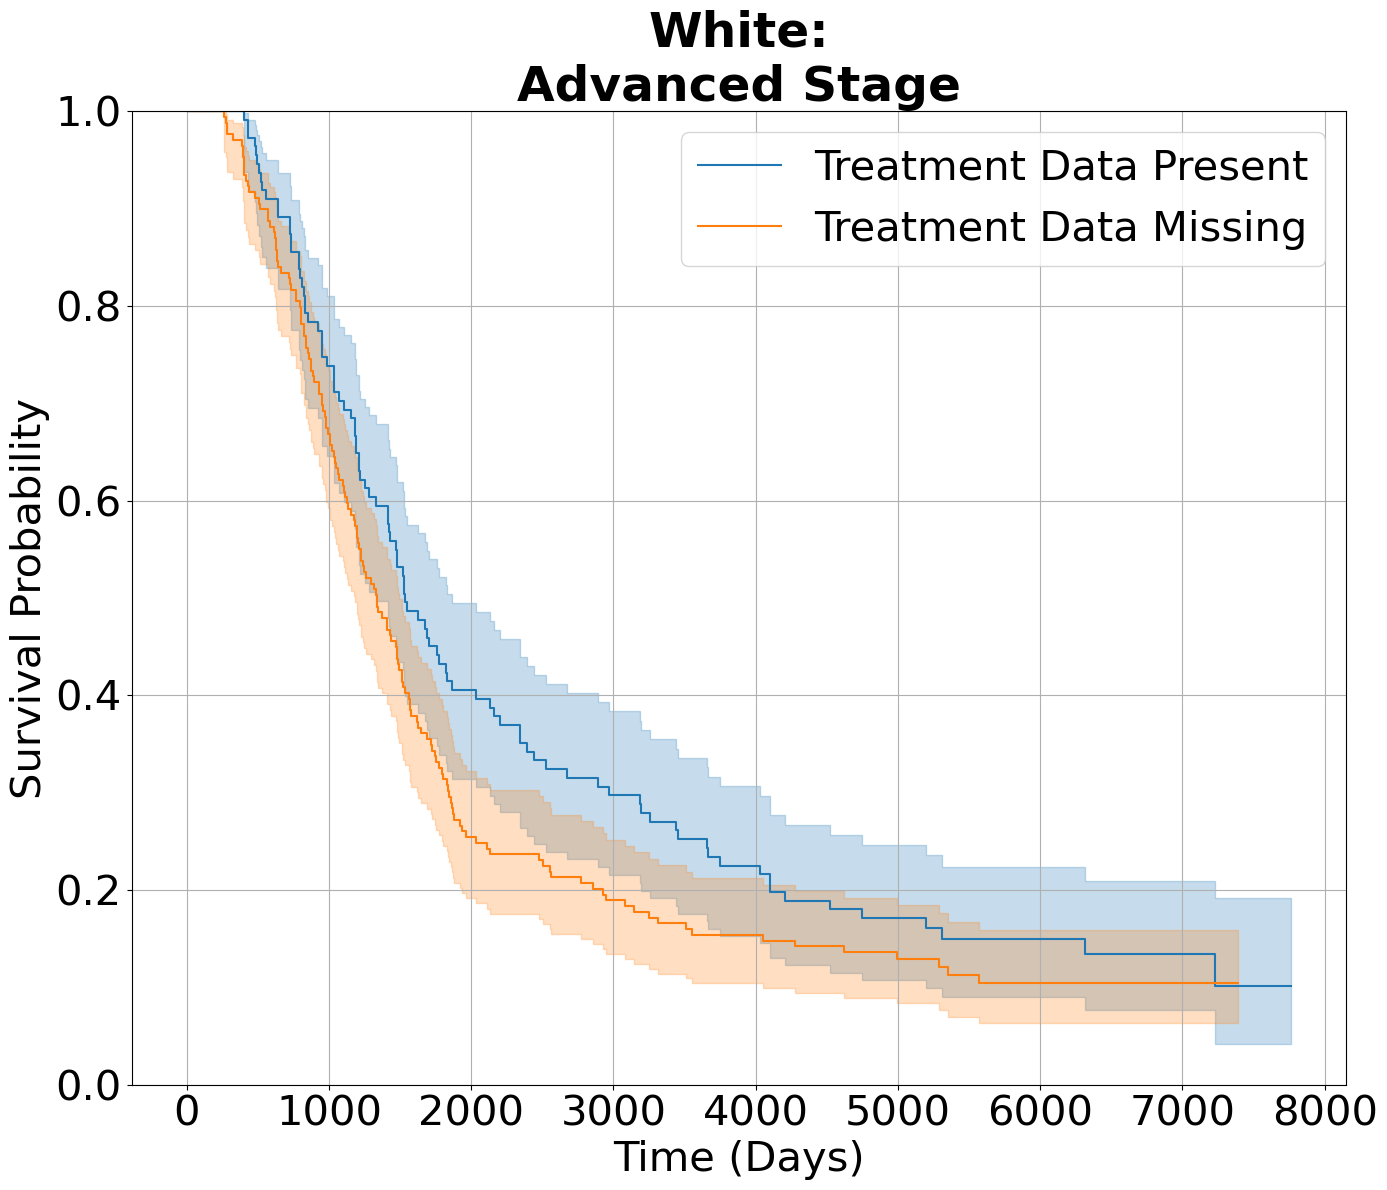

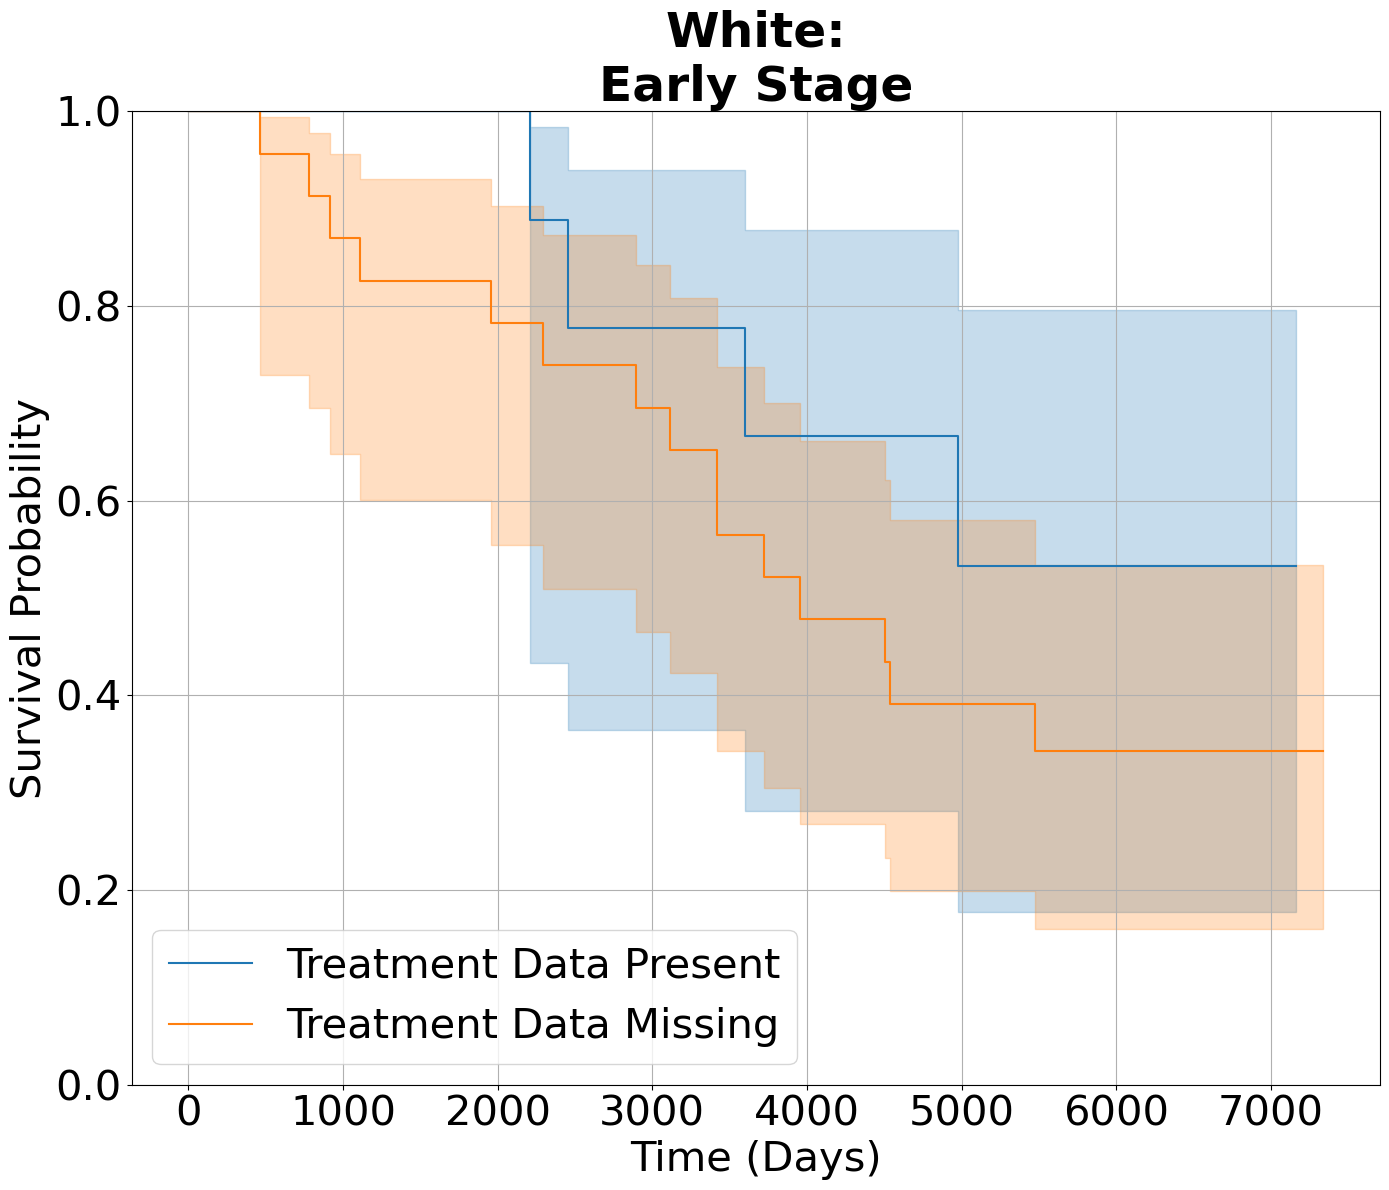

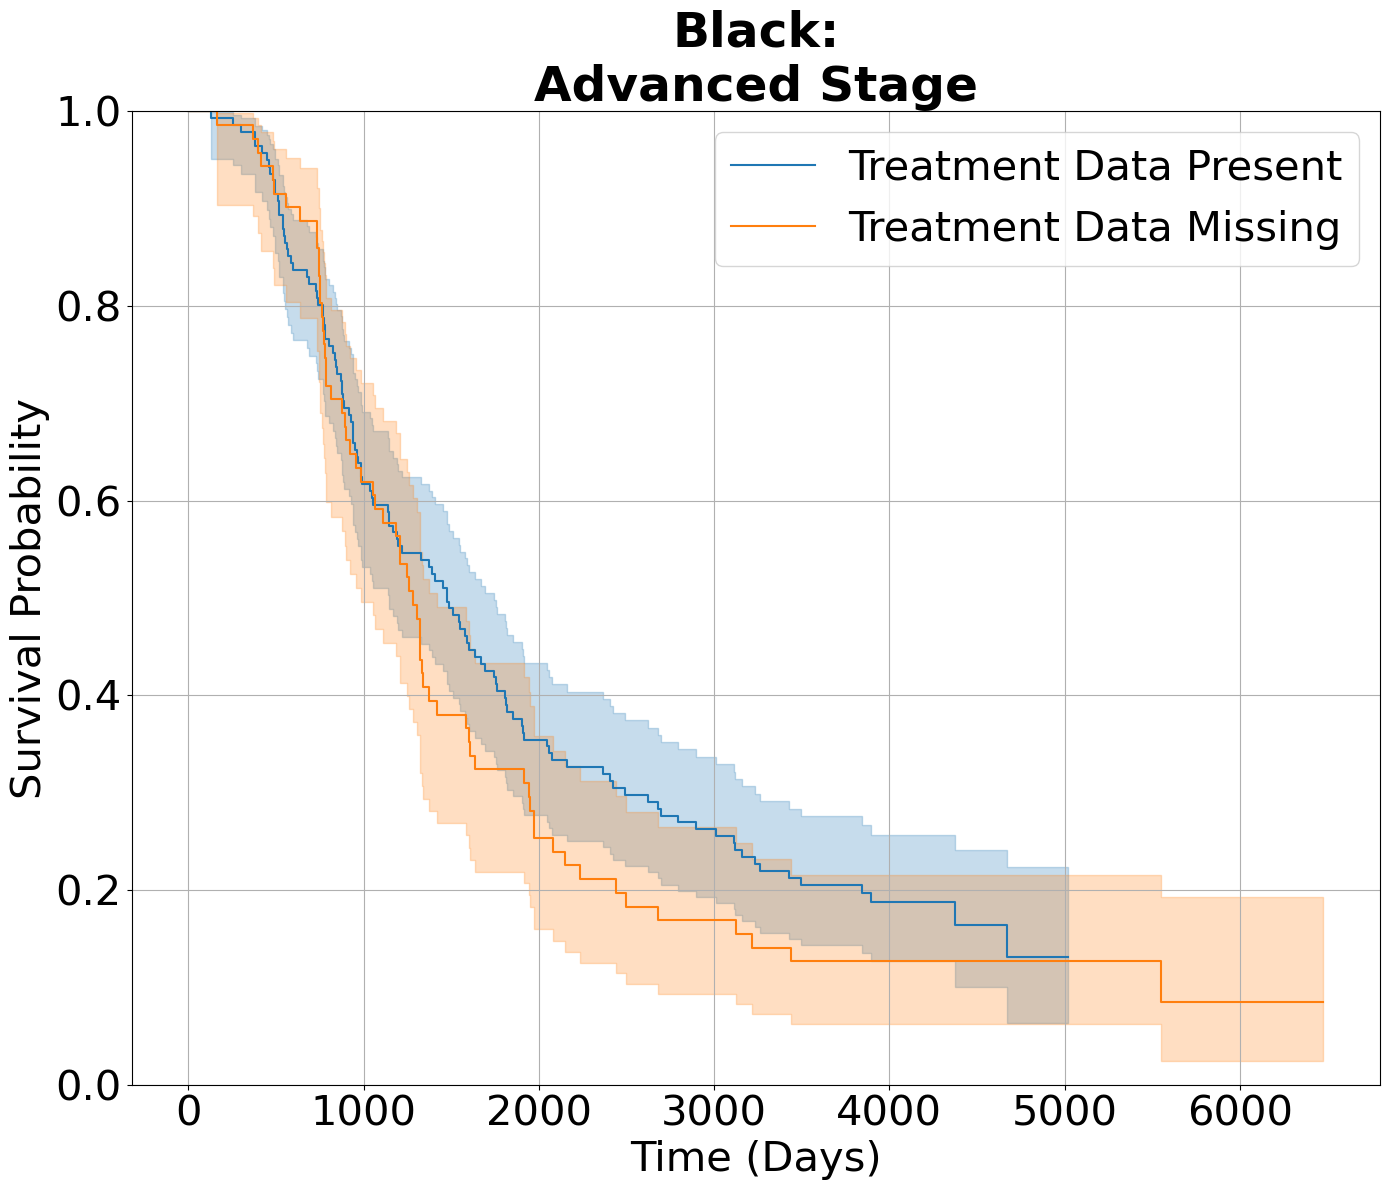

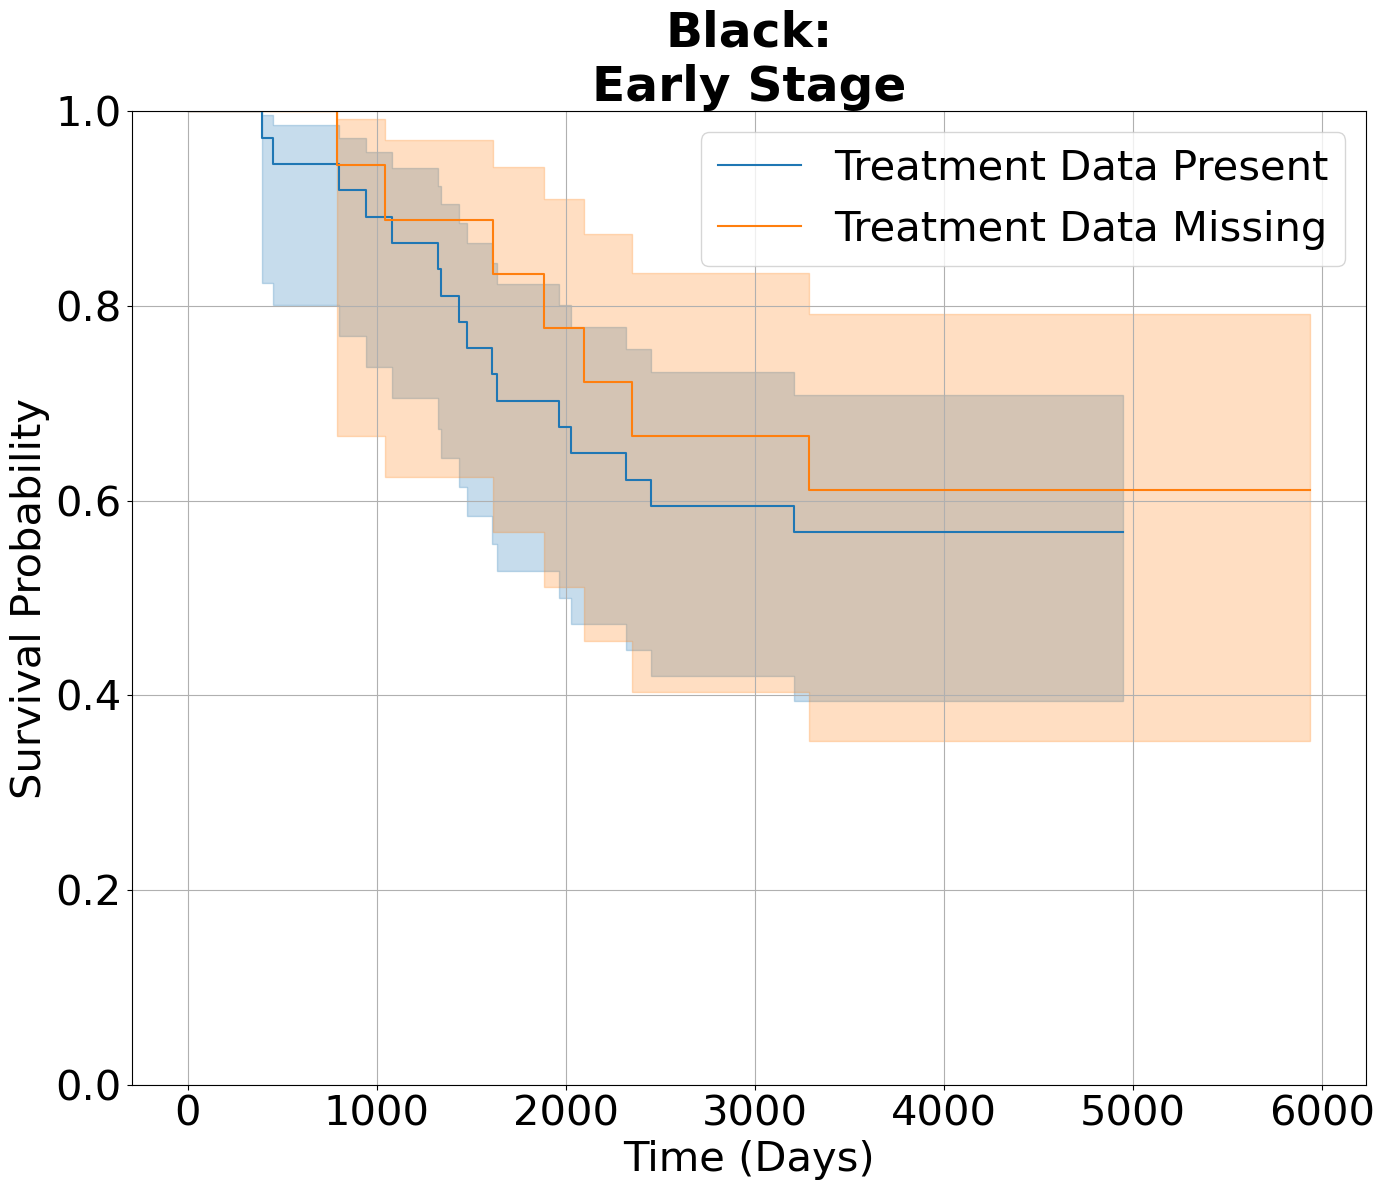

In [81]:
for key in meta:
    # Define treatment columns
    treat_cols = ["Residual"]

    # Create a new column indicating if all treatment info is missing
    analysis[key]["all_treat_missing"] = analysis[key][treat_cols].isna().all(axis=1)

    # Define time and event columns (adjust names as needed)
    duration_col = "Time-Days"
    event_col = "Event"

    # Split the data into two groups
    has_info = analysis[key][~analysis[key]["all_treat_missing"]]
    missing_info = analysis[key][analysis[key]["all_treat_missing"]]

    hp.plot_km(
        has_info=has_info[has_info.Stage.isin([3, 4])],
        missing_info=missing_info[missing_info.Stage.isin([3, 4])],
        title=f"{key.capitalize()}:\nAdvanced Stage",
        duration_col=duration_col,
        event_col=event_col,
    )

    hp.plot_km(
        has_info=has_info[has_info.Stage.isin([1, 2])],
        missing_info=missing_info[missing_info.Stage.isin([1, 2])],
        title=f"{key.capitalize()}:\nEarly Stage",
        duration_col=duration_col,
        event_col=event_col,
    )
    analysis[key].drop(columns=["all_treat_missing"], inplace=True)

## And Kaplan curves with all patients together

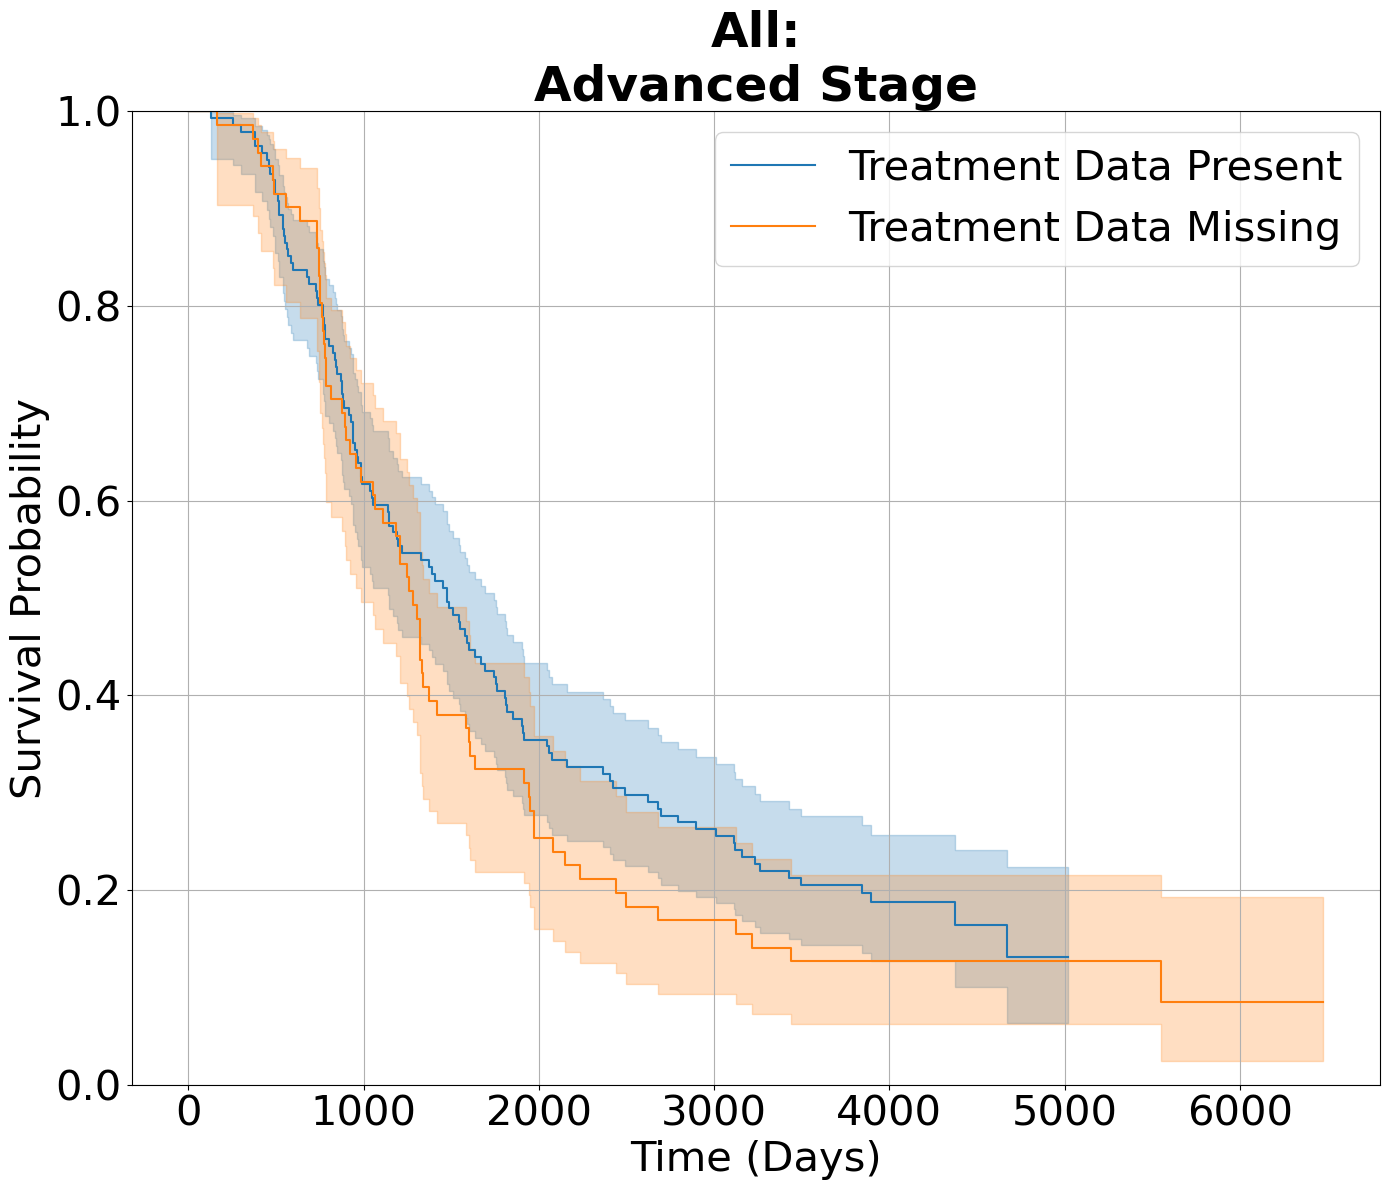

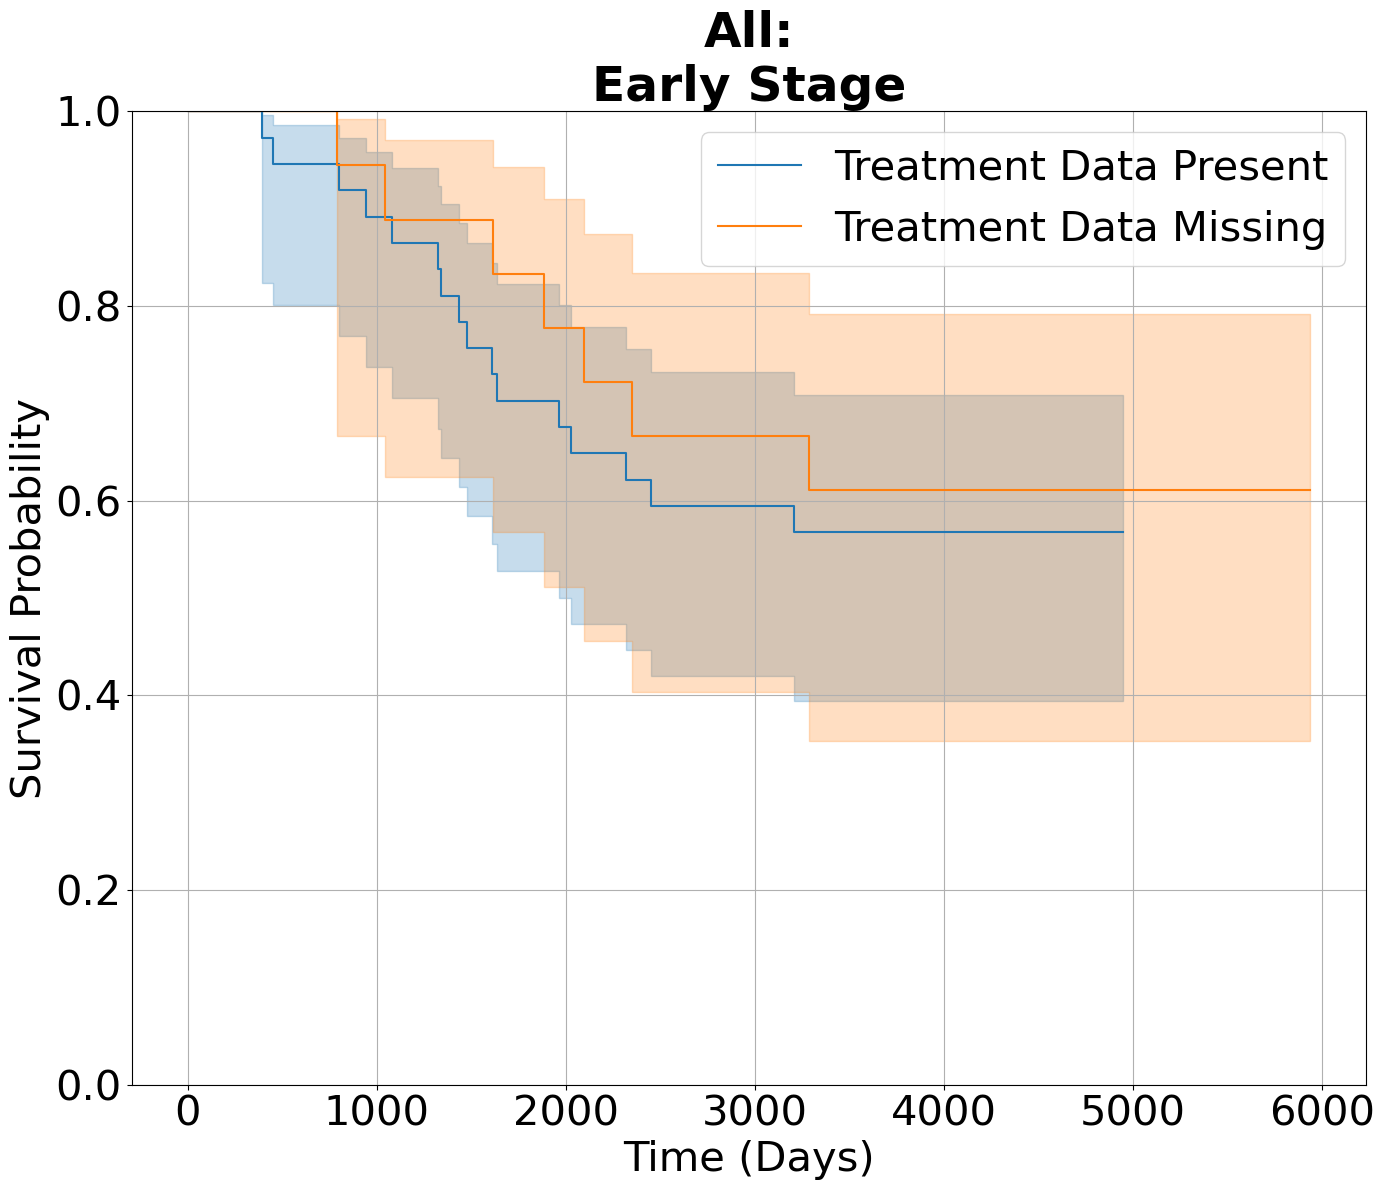

In [82]:
# Define treatment columns
treat_cols = ["Residual"]

# Create a new column indicating if all treatment info is missing
analysis_full["all_treat_missing"] = analysis_full[treat_cols].isna().all(axis=1)

# Define time and event columns (adjust names as needed)
duration_col = "Time-Days"
event_col = "Event"

# Split the data into two groups
has_info = analysis_full[~analysis_full["all_treat_missing"]]
missing_info = analysis_full[analysis_full["all_treat_missing"]]

hp.plot_km(
    has_info=has_info[has_info.Stage.isin([3, 4])],
    missing_info=missing_info[missing_info.Stage.isin([3, 4])],
    title="All:\nAdvanced Stage",
    duration_col=duration_col,
    event_col=event_col,
)

hp.plot_km(
    has_info=has_info[has_info.Stage.isin([1, 2])],
    missing_info=missing_info[missing_info.Stage.isin([1, 2])],
    title="All:\nEarly Stage",
    duration_col=duration_col,
    event_col=event_col,
)
analysis_full.drop(columns=["all_treat_missing"], inplace=True)

## We'll also check the variables match two to one

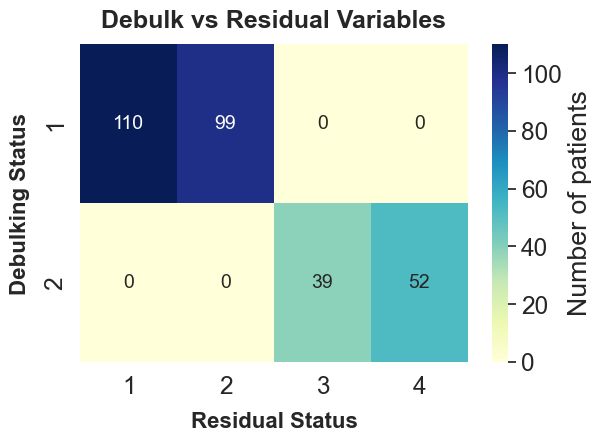

In [83]:
cross_tab = pd.crosstab(meta_full_copy["Debulk"], meta_full_copy["Residual"])
sns.set(style="white", font_scale=1.6)

ax = sns.heatmap(
    cross_tab,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    annot_kws={"fontsize": 14},
    cbar_kws={"label": "Number of patients"},
)

ax.set_title("Debulk vs Residual Variables", fontsize=18, pad=12, fontweight="bold")
ax.set_xlabel("Residual Status", fontsize=16, labelpad=10, fontweight="bold")
ax.set_ylabel("Debulking Status", fontsize=16, labelpad=10, fontweight="bold")
ax.set_xticklabels([1, 2, 3, 4])
ax.set_yticklabels([1, 2])
plt.tight_layout()
plt.show()